**Ejemplo: Fraudes en tarjetas de credito**

William Fallas, skype:wfallas002

Latex, ejemplo de notacion matematica


\begin{vmatrix}
1 & 2 & 3\\
a & b & c
\end{vmatrix}




$$\int_{a}^b f(x)dx$$


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
from google.colab import drive

Cargar los csv al ambiente google

In [ ]:
drive.mount('/content/drive/')


miDatasetPath = '/content/creditcard.csv'
data  = pd.read_csv(miDatasetPath, header=0)

data.head()

Mounted at /content/drive/


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Tiene el dataset valores nulos??

In [ ]:
data.isnull().values.any()

True

Si existieran nulos se reeemplazan por el promedio...

Es la mejor tecnica????

In [ ]:
#data=data.fillna(data.mean())

data=data.dropna()

In [ ]:
#describir los datos
print(data.shape) 
print(data.describe()) 

(53570, 31)
               Time            V1  ...        Amount         Class
count  53570.000000  53570.000000  ...  53570.000000  53570.000000
mean   30004.564887     -0.243201  ...     94.260870      0.002856
std    13302.488835      1.879610  ...    252.290845      0.053366
min        0.000000    -56.407510  ...      0.000000      0.000000
25%    23663.250000     -0.994265  ...      7.680000      0.000000
50%    34250.500000     -0.249507  ...     25.495000      0.000000
75%    40126.750000      1.154648  ...     86.867500      0.000000
max    46048.000000      1.960497  ...  12910.930000      1.000000

[8 rows x 31 columns]


Obtener los vectores de fraudes y no fraude

In [ ]:
fraudes = data[data['Class'] == 1] 
validos = data[data['Class'] == 0] 
outlierFraction = len(fraudes)/float(len(validos)) 
print(outlierFraction) 
print('Casos de Fraudes: {}'.format(len(data[data['Class'] == 1]))) 
print('Transactiones Validas: {}'.format(len(data[data['Class'] == 0]))) 

0.0028642566973061012
Casos de Fraudes: 153
Transactiones Validas: 53417


Es un dataset totalmente desbalanceado

Montos fraudulentos, que tan altos son montos defraudados

In [ ]:
print("Distribucion del monto en transacciones fraudes") 
fraudes["Amount"].describe() 

Distribucion del monto en transacciones fraudes


count     153.000000
mean       97.616013
std       230.026856
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

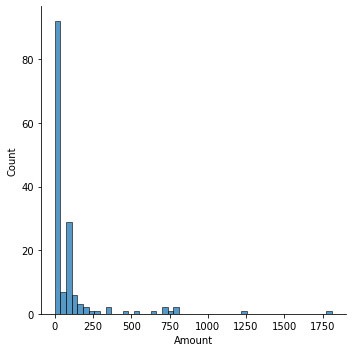

In [ ]:
#como se ve la distribucion en grafico
sns.displot(fraudes["Amount"])

In [ ]:
print("Distribucion del monto en transacciones validas") 
validos.Amount.describe() 

Distribucion del monto en transacciones validas


count    53417.000000
mean        94.251260
std        252.353693
min          0.000000
25%          7.680000
50%         25.520000
75%         86.650000
max      12910.930000
Name: Amount, dtype: float64

**Matriz de Correlacion**

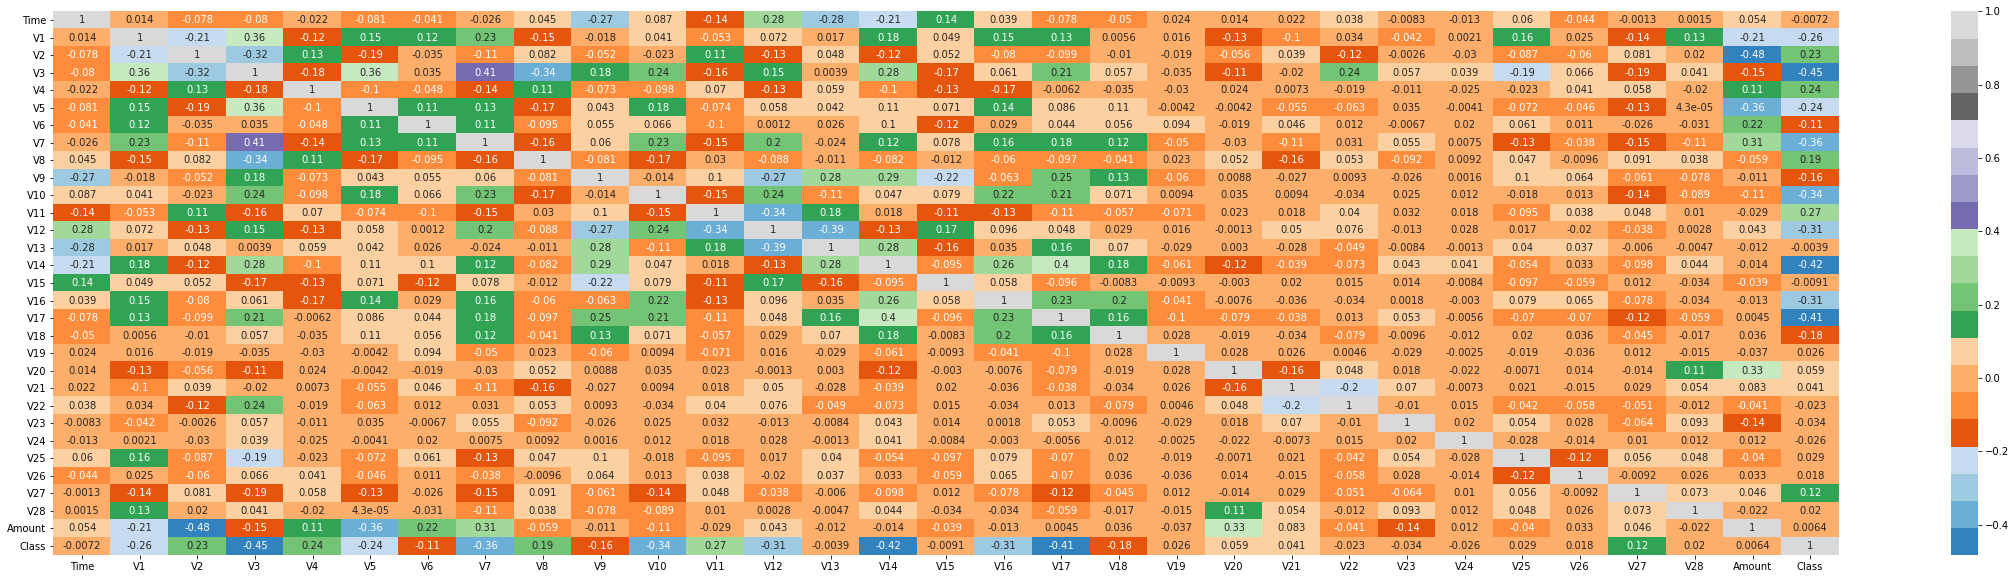

In [ ]:

plt.figure(figsize = (40,10))
sns.heatmap(data.corr(), annot = True, cmap="tab20c")
plt.show()

### **Visualizacion de los registros**

es posible ver 30 dimensiones???

In [ ]:

dfSample= validos.sample(n = 3000) #tomar un ejemplo de 3000 registros no fraudes

df_Union = pd.concat([dfSample, fraudes]) # concatenarlo con los fraudes
df_Union= df_Union.sample(frac=1)# randonmize para q no esten todos juntos

y = df_Union['Class']




**Estandarizar el Dataset**

z = (x - u) / s

Los algoritmos que trabajan con distancias deben ser estandarizados


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_Standart = sc.fit_transform(df_Union)

X_Standart

array([[ 0.76566012, -0.13414315, -0.53516945, ...,  0.5872792 ,
         2.62412373, -0.2258318 ],
       [ 0.90667135,  0.05994744,  0.38475002, ...,  0.39705029,
        -0.29882866, -0.2258318 ],
       [ 0.73281874, -0.03241748,  0.10679472, ...,  0.22462476,
         0.15765297, -0.2258318 ],
       ...,
       [ 0.22105972, -0.12727584, -0.35423465, ...,  0.10692369,
        -0.30605927, -0.2258318 ],
       [ 0.28926874, -0.08593047, -0.14325593, ...,  0.55740766,
        -0.08338046, -0.2258318 ],
       [-1.33151838,  0.59615601, -0.3817914 , ..., -0.00855747,
        -0.11794434, -0.2258318 ]])

**Tecnica PCA**

PCA was invented in 1901 by Karl Pearson

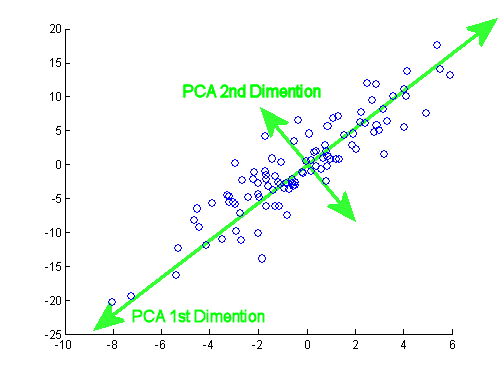

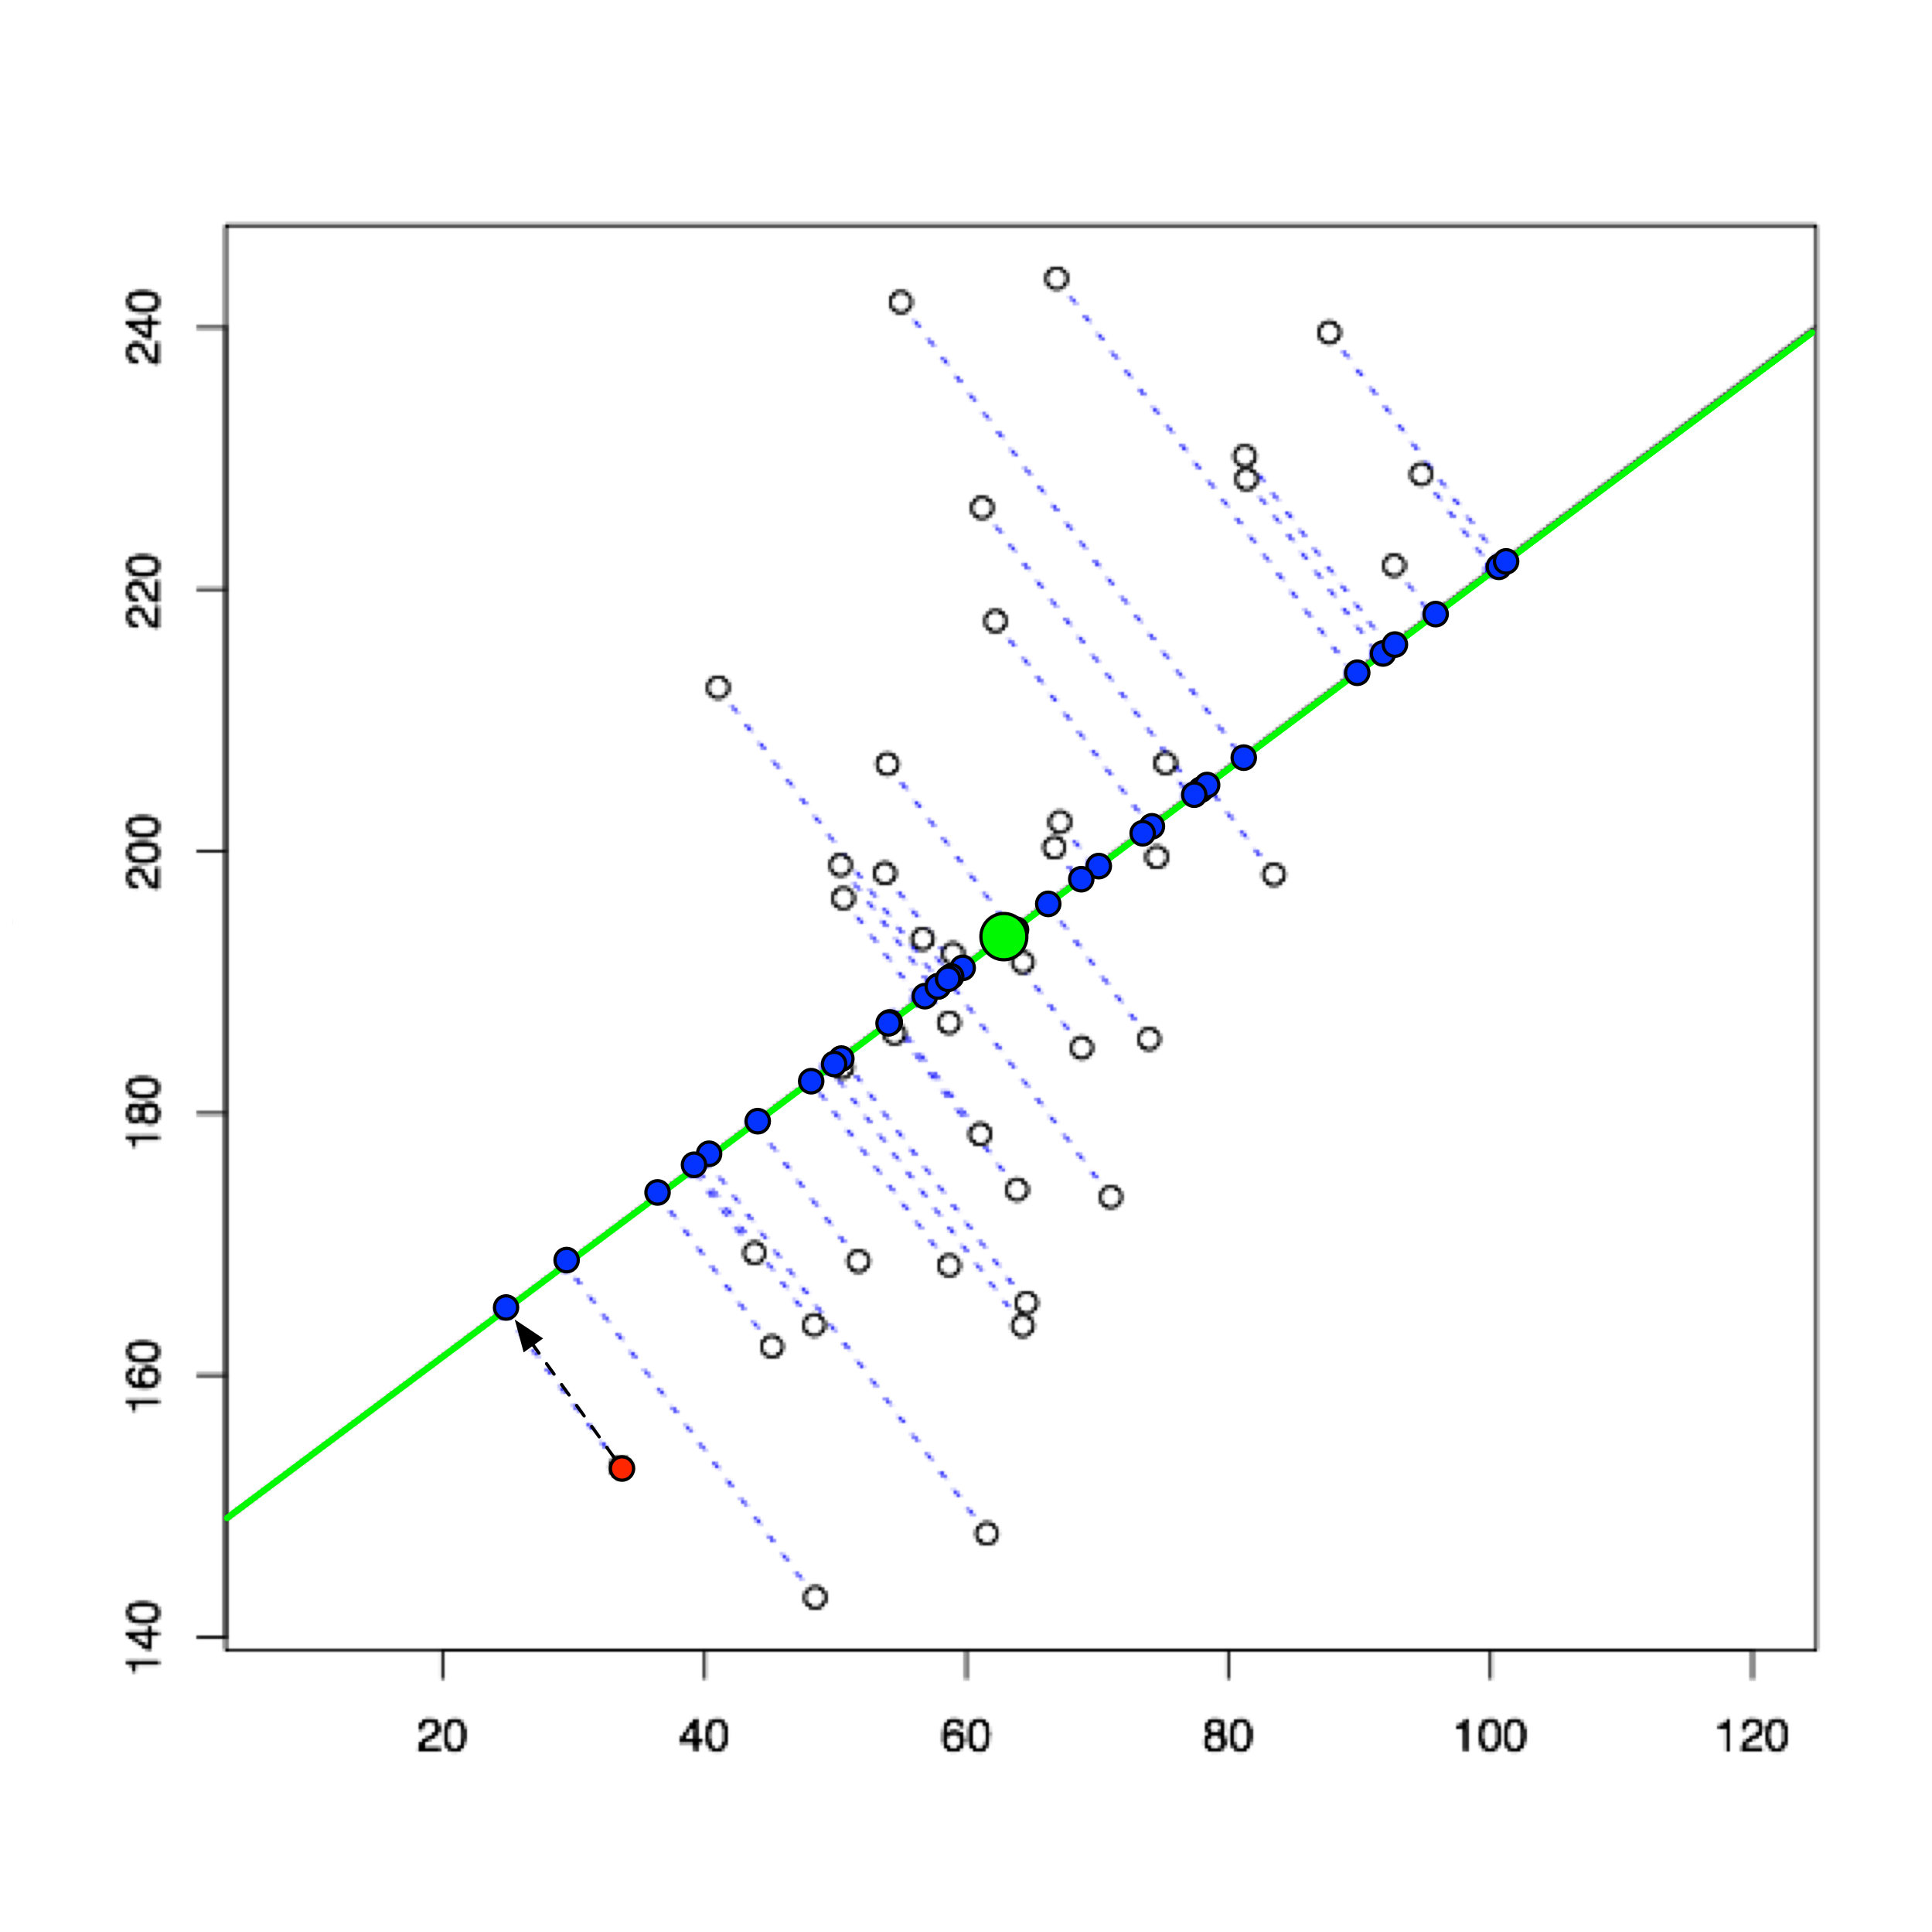

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)  
X_PCA = pca.fit_transform(X_Standart) 

X_PCA

array([[-1.16668362,  2.58101919,  1.02029549],
       [-0.36819894,  0.18579503, -1.43351703],
       [-0.66497925,  0.74496994, -0.80022387],
       ...,
       [-0.28536407, -0.04639455, -1.48607872],
       [-0.44598662,  0.34600985, -0.70780868],
       [-0.91523689, -1.01892424,  2.09879765]])

In [ ]:
pca.explained_variance_ratio_

array([0.32862701, 0.05859678, 0.05405478])

In [ ]:
idx_1 = np.where(y == 1.0)
idx_0 = np.where(y == 0.0)

Matrix_Fraudes = X_PCA[idx_1]
Matrix_Validos = X_PCA[idx_0]


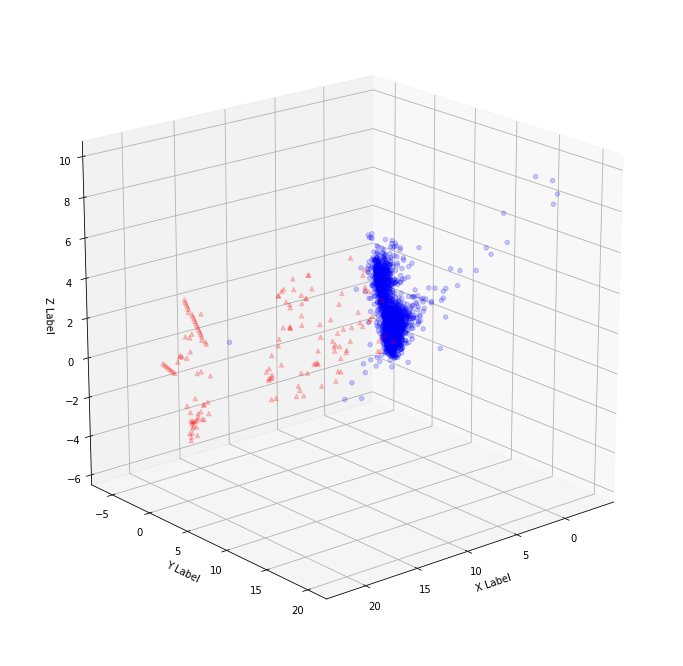

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

xs =Matrix_Validos[:,0] #X, buenos
ys =Matrix_Validos[:,1] #Y, buenos
zs =Matrix_Validos[:,2] #Z, buenos

xt =Matrix_Fraudes[:,0]#X malos
yt =Matrix_Fraudes[:,1]#Y malos
zt =Matrix_Fraudes[:,2]#Z malos

ax.scatter(xs, ys, zs, c='b', marker='o',alpha=0.2)
ax.scatter(xt, yt, zt, c='r', marker='^',alpha=0.2)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

angle = 50
ax.view_init(20, angle)
plt.draw()
plt.show()

## ***T-SNE*** 

Developed in 2007 by Sam Roweis and Geoffrey Hinton

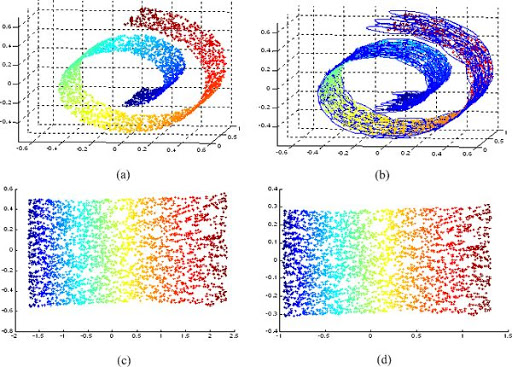

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
Data_TSE = tsne.fit_transform(X_Standart)

In [ ]:
Matrix_Fraudes = Data_TSE[idx_1]
Matrix_Validos = Data_TSE[idx_0]

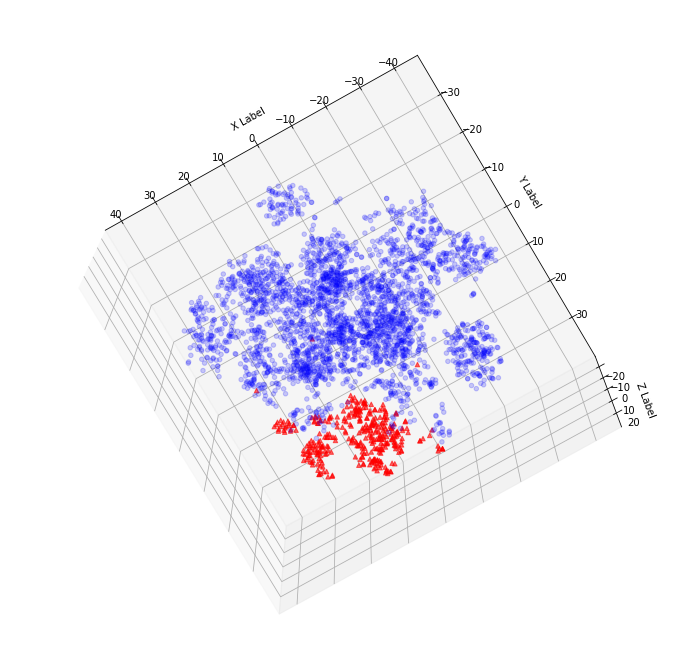

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

xs =Matrix_Validos[:,0] #X, buenos
ys =Matrix_Validos[:,1] #Y, buenos
zs =Matrix_Validos[:,2] #Z, buenos

xt =Matrix_Fraudes[:,0]#X malos
yt =Matrix_Fraudes[:,1]#Y malos
zt =Matrix_Fraudes[:,2]#Z malos

ax.scatter(xs, ys, zs, c='b', marker='o',alpha=0.2)
ax.scatter(xt, yt, zt, c='r', marker='^',alpha=0.6)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

angle = 60
ax.view_init(100, angle)
plt.draw()
plt.show()

Las visualizaciones a anteriores demuestran que es posible dividir un

# **Entrenar un modelo**

In [ ]:
# dividir el dataset en X y Y

X= data
X = data.drop(['Class'], axis = 1) 

Y = data["Class"] 

print(X.shape) 
print(Y.shape) 

xData = X.values 
yData = Y.values 

(53570, 30)
(53570,)


In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53565,46047,-0.024605,-0.494761,1.767898,-1.960268,-1.474040,-0.556345,-0.628335,0.079381,-2.356645,1.204992,1.037097,-0.972110,-0.565106,-0.161239,-0.088341,-0.168441,0.307815,0.998015,-0.070652,-0.309752,0.117860,0.635597,-0.126503,0.517471,-0.084368,-0.101974,0.055747,0.016774,20.55
53566,46047,-2.885416,-2.647887,1.903441,3.726885,3.800798,-1.644480,-1.924198,0.707696,-1.070468,1.025229,0.590276,0.531855,-0.873510,0.284279,-2.075755,0.588081,-0.515094,-0.437550,-1.863019,0.619500,0.284893,-0.268122,0.977417,0.136853,-1.144367,-0.535616,0.098494,0.305740,19.02
53567,46048,1.061410,0.045830,0.970401,1.102883,-0.490685,0.219968,-0.424285,0.235960,0.016498,0.116565,1.531313,1.074447,0.154534,0.294224,0.747177,0.415745,-0.593013,0.065704,-0.611904,-0.092446,0.033158,0.067127,0.053801,-0.010221,0.209877,-0.484136,0.057583,0.028018,28.70
53568,46048,-0.202740,0.295074,1.924698,1.009344,-0.235931,-0.272232,0.261015,-0.162146,-0.583849,0.361002,1.691854,0.931361,0.959252,-0.052824,1.124789,-0.237540,-0.265445,0.732205,1.543658,0.457057,0.321731,1.056540,0.093902,0.608566,-0.931546,0.466156,0.016695,-0.024568,54.81


Dividir el dataset en trainning y testing, se pueden hacer varias pruebas con los tamanios

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
# Usas Skicit-learn para dividir en test y train
# dividir en 25 test, 75% training se pued ejugar con esto
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.25, random_state = 42) 


**Arbol de desicion**

In [ ]:

# DecisionTreeClassifier Classifier
from sklearn.tree  import DecisionTreeClassifier 
# creacion del modelo
rfc = DecisionTreeClassifier() 
rfc.fit(xTrain, yTrain) 
# precciones con el dataset de test
yPred = rfc.predict(xTest) 

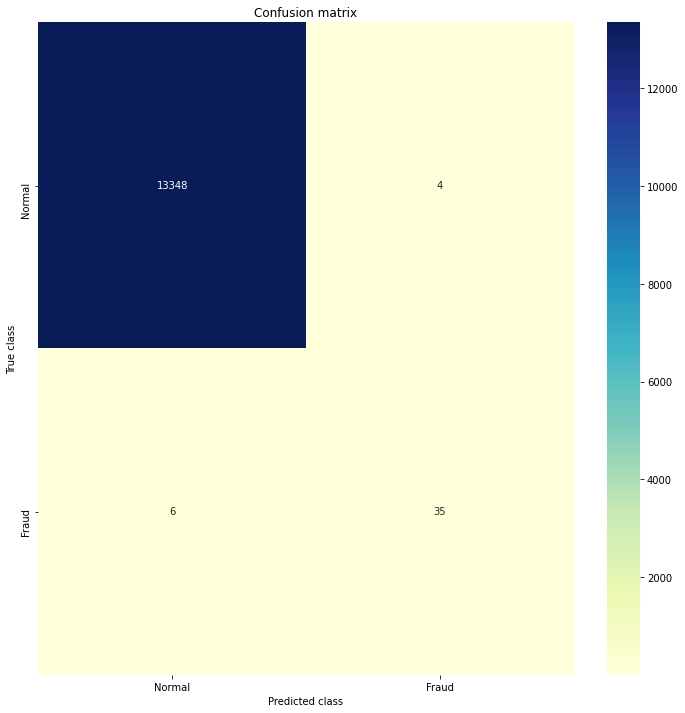

In [ ]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d",cmap="YlGnBu"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraudes) 
n_errors = (yPred != yTest).sum() 
print("Modelo:  DecisionTreeClassifier") 
  
acc = accuracy_score(yTest, yPred) 
print("Accuracy  {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("Precision  {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("Recall {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print(" F1-Score  {}".format(f1)) 

Modelo:  DecisionTreeClassifier
Accuracy  0.9992533412976928
Precision  0.8974358974358975
Recall 0.8536585365853658
 F1-Score  0.875


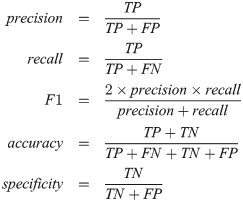

Quiero que mi recall sea muy alto, que no me diga que una transaccion es normal cuando en realidad es un fraude

**Sabiduria de la Multitud: Random Forest**

In [ ]:
import time

start_time = time.time()
# Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# creacion del modelo
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# precciones con el dataset de test
yPred = rfc.predict(xTest) 

end_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))



--- 20.09517002105713 seconds ---


**Atributos con mayor poder de prediccion**

Text(0.5, 1.0, 'Importancia de las variables')

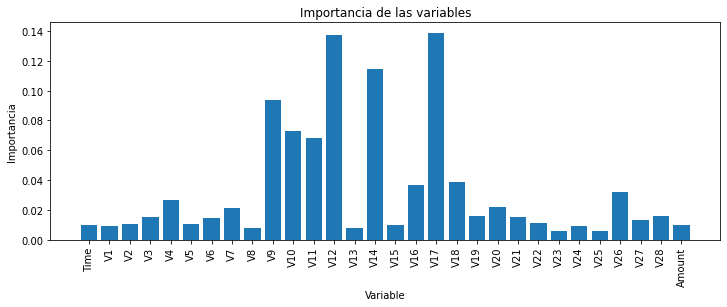

In [ ]:
Cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
    
importances = rfc.feature_importances_

x_values = list(range(len(importances)))

fig = plt.figure(figsize=(12,4))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, Cols, rotation=90)
plt.ylabel('Importancia')
plt.xlabel('Variable')
plt.title('Importancia de las variables')

**Evaluacion del clasificador**

In [ ]:

# Evaluating the classifier 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraudes) 
n_errors = (yPred != yTest).sum() 
print("Modelo:  Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("Accuracy  {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("Precision  {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("Recall {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print(" F1-Score  {}".format(f1)) 
  


Modelo:  Random Forest classifier
Accuracy  0.9997013365190771
Precision  1.0
Recall 0.9024390243902439
 F1-Score  0.9487179487179488


el recall es muy bajo, 22 que se predijeron como nromales en realidad eran fraudes, la meta es aumentar ese recall

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

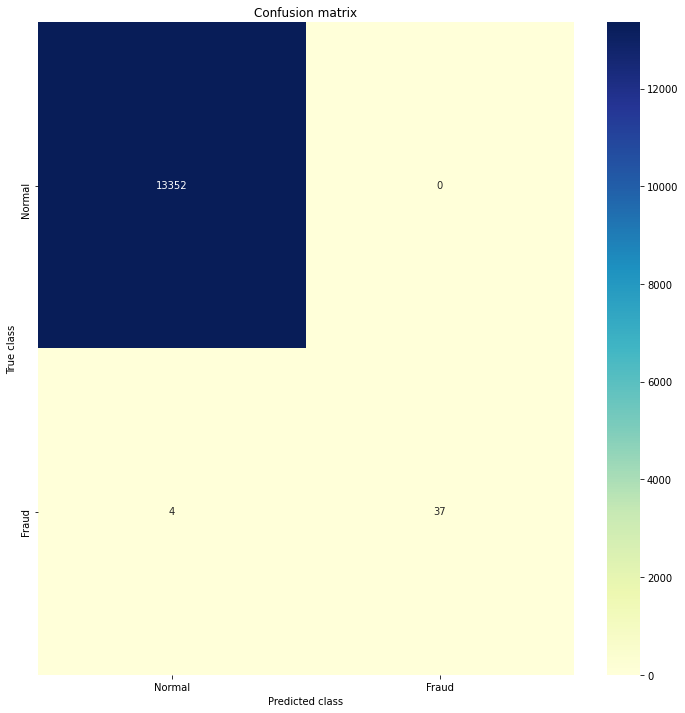

In [ ]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d",cmap="YlGnBu"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

3 fraudes considerados como normales... 

Hasta ahora se ha tratado como un problema de clasificacion, es esto correcto??

### **Insolation Forest**

Estamos ante un problema de deteccion de anomalias, lo normal es que los movimientos de tarjetas de credito no sean fraudolentas.

 Metodo no supervizado, es necesario conocimiento del tema y/o criterios de expertos

 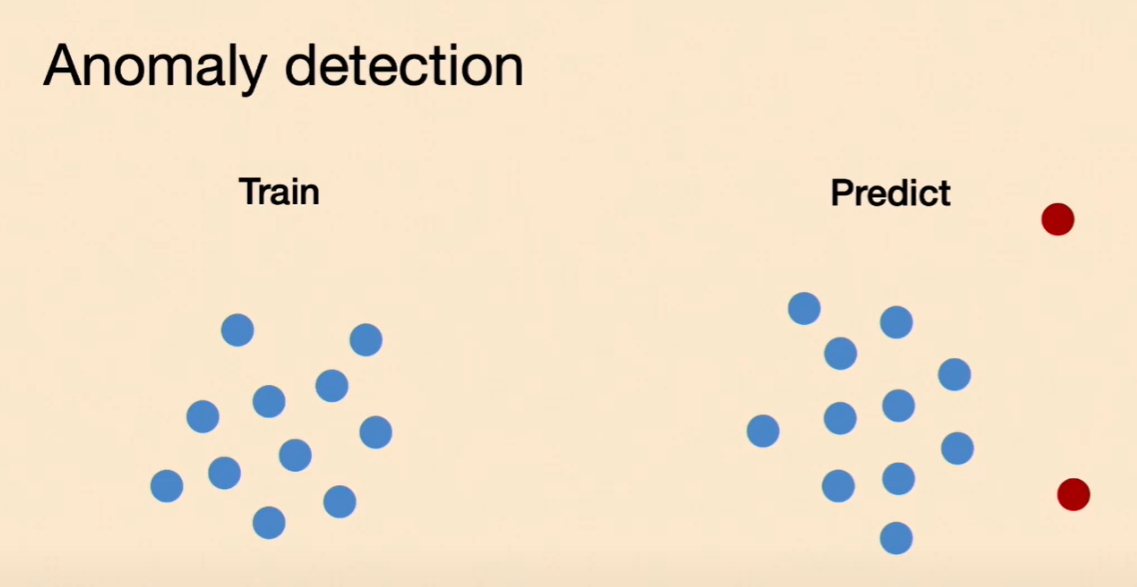

In [ ]:
import time
import warnings
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection


In [ ]:

inliers = data[data.Class==0]
inliers = inliers.drop(['Class'], axis=1)
outliers = data[data.Class==1]
outliers = outliers.drop(['Class'], axis=1)
inliers_train, inliers_test = train_test_split(inliers, test_size=0.30, random_state=42)

In [ ]:

start_time = time.time()

model = IsolationForest()
model.fit(inliers_train)
inlier_pred_test = model.predict(inliers_test)
outlier_pred  = model.predict(outliers)

end_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))


--- 3.0953712463378906 seconds ---


Fraudes que se clasificaron como validos

In [ ]:
Errors = outlier_pred[outlier_pred == 1]
Errors.shape

(14,)

In [ ]:
print("Accuracy Casos legitimos:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy Casos de fraude:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy Casos legitimos: 0.9568201672282541
Accuracy Casos de fraude: 0.9084967320261438


Ejemplo de prediccion con modelo construido

In [ ]:
fraude =outliers.sample(1)
fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42887,41285,-12.83576,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,-13.074068,5.975131,-12.375375,1.472205,-11.470693,0.993143,-10.973805,-21.04763,-7.990783,3.331039,-0.617296,2.67949,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.81768,-0.52103,37.32


In [ ]:
fraude =outliers.sample(1)
result  = model.predict(fraude)
print(result)

[-1]


In [ ]:
valido =inliers.sample(1)
valido

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
16677,28037,-0.536614,0.979877,1.179084,0.023424,0.041712,-0.54227,0.539198,0.117022,-0.081295,-0.401871,-0.262143,-0.872731,-1.545393,-0.10876,1.337253,0.158704,0.372837,-0.391118,-0.435232,-0.034532,-0.237548,-0.710734,0.061166,-0.023002,-0.295776,0.094713,0.117405,0.091887,12.98


In [ ]:

result  = model.predict(valido)
print(result)

[1]


** *italicized text*Es posible mejorar el recall  ?**


**Ensamblado de distintos algoritmos**

**Cross Validation**


**GridSearchCV: buscar los mejores hyperParametros**

**Deep Learning**

In [ ]:
warnings.filterwarnings("ignore")
start_time = time.time()

clf = IsolationForest(random_state=47, behaviour='new')

param_grid = {'n_estimators': list(range(100, 800, 5)), 
              'max_samples': list(range(100, 500, 5)), 
              'contamination': [0.01, 0.2, 0.3, 0.5], 
              'bootstrap': [True, False]}

#n_estimators:  number of estimators or trees in the ensemble
#max_samples: he number of samples to be drawn to train each tree
#contamination: The amount of contamination of the data set, i.e. the proportion of outliers in the data set.default: 0.1
#bootstrap : con o sin reemplazo

f1sc=make_scorer(f1_score, average='micro')

grid_dt_estimator = model_selection.GridSearchCV(clf, 
                                                 param_grid,
                                                 scoring=f1sc, 
                                                 refit=True,
                                                 cv=10, 
                                                 return_train_score=True)
grid_dt_estimator.fit(xTrain, yTrain)

end_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
best_parameters = grid_s.best_params_
print(best_parameters)

## **Autoencoders NN**

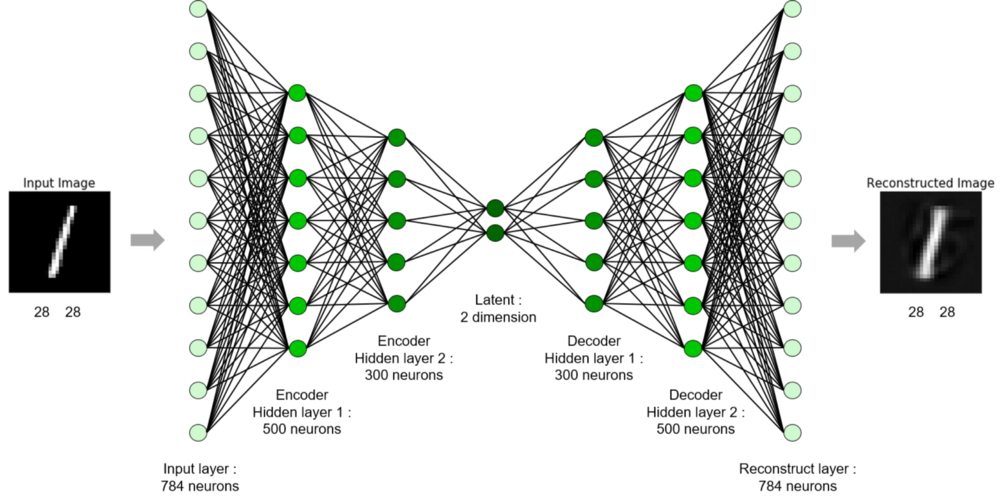

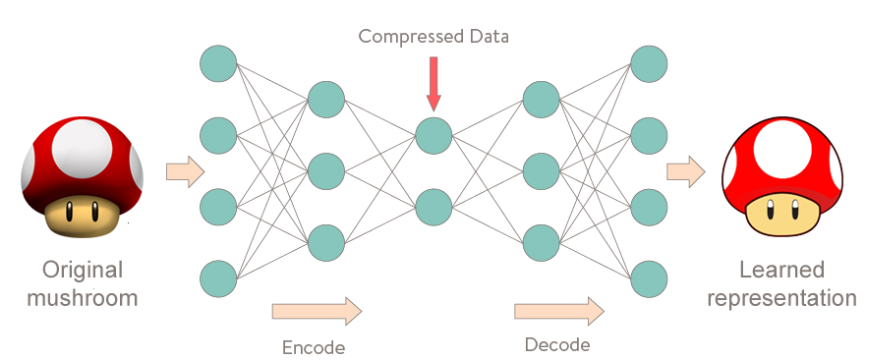